# Practical implementation of SVM kernels and influence of C from Scratch

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from PIL import Image
from SVM import *

### Andrew Ng dataset1

In [3]:
data = scipy.io.loadmat('dataset/ex6data1.mat')

In [3]:
X = data['X']
y = data['y'].flatten()

### Visualizing data

In [4]:
def plotdata(X,y):
    neg = y == 0
    pos = y == 1
    plt.plot(X[pos,0],X[pos,1],'kx',label = 'Positive')
    plt.plot(X[neg,0],X[neg,1],'yo',label = 'Negative')
    plt.show()

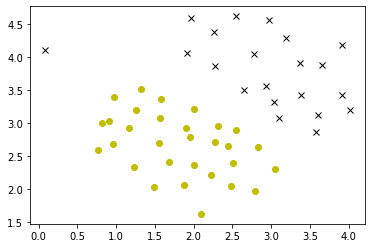

In [5]:
plotdata(X,y)

In [6]:
SVM= SVM()

#### The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. 

1. C = 1/lambda ( Lambda is regularization term used in logistic regression)


2. If C is high, low Bias High variance (Overfitting)

   If C is low, High Bias low variance (Underfitting)

### Choosing C = 1

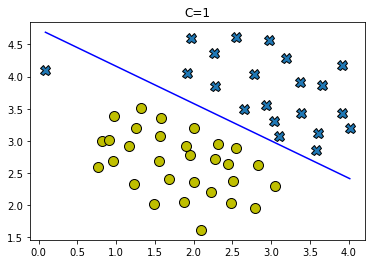

In [7]:
C =1
model = SVM.svmTrain(X, y, C,SVM.linearKernel)
SVM.visualizeBoundaryLinear(X, y, model,'C={}'.format(C))

## Iterating the value of C

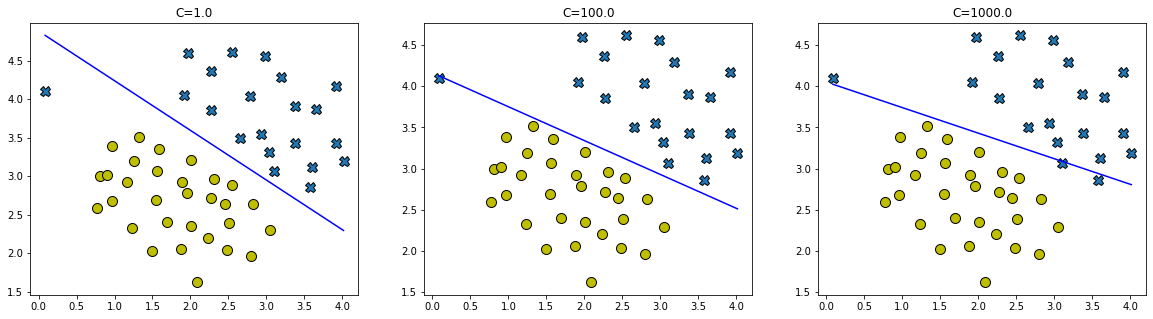

In [8]:
cals = [1.0,100.0,1000.0]
plt.figure(figsize=(20,5))
for i,c in enumerate(cals):
    model = SVM.svmTrain(X, y, c,SVM.linearKernel)
    plt.subplot(1,3,i+1)
    SVM.visualizeBoundaryLinear(X, y, model,'C={}'.format(c))

### Gaussian Kernel

![title](Figure/GaussianK.png)

In [9]:
def gaussianKernel(x1, x2, sigma):
    sim = np.exp(-1 *((np.sum((x1-x2)**2))/(2*(sigma**2))))
    return sim

In [10]:
x1 = np.array([1,2,1])
x2 = np.array([0,4,-1])
sigma = 2
gaussianKernel(x1,x2,sigma)

0.32465246735834974

### Applying GaussianKernals in a data set

In [4]:
dt = scipy.io.loadmat('dataset/ex6data2.mat')
X, y = dt['X'], dt['y'][:, 0]

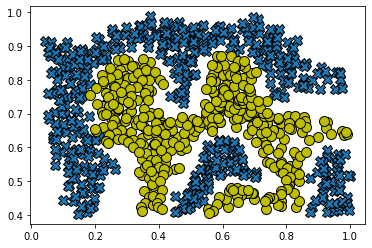

In [12]:
SVM.plotdata(X, y)

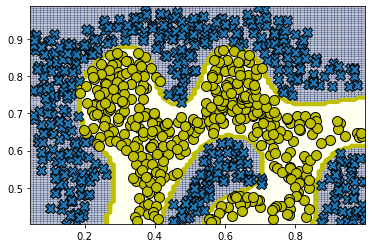

In [13]:
C = 1
sigma = 0.1
model= SVM.svmTrain(X, y, C, gaussianKernel, args=(sigma,))
SVM.visualizeBoundary(X, y, model)

### Applying GaussianKernals in a data set

In [5]:
dt1 = scipy.io.loadmat('dataset/ex6data3.mat')
X, y = dt1['X'], dt1['y'][:, 0]
Xval,yval = dt1['Xval'], dt1['yval'][:, 0]

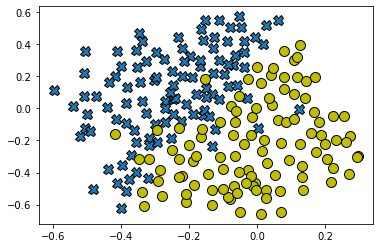

In [15]:
SVM.plotdata(X, y)

### Choosing optimal value of C and Sigma

In [16]:
def find_best_c_sigma(X, y, Xval, yval):

    C_vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    sigma_vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    error = 9999

    C = 0.01
    sigma = 0.01
    for c in C_vals:
        for s in sigma_vals:
            model= SVM.svmTrain(X, y, c, gaussianKernel, args=(s,))
            y_pred = SVM.svmPredict(model,Xval)
            error_mean = np.mean(y_pred != yval)
            if error_mean < error:
                C = c
                sigma = s
                error = error_mean
    return C, sigma

In [17]:
C, sigma = find_best_c_sigma(X, y, Xval, yval)

In [18]:
C

1

In [19]:
sigma

0.1

In [20]:
model= SVM.svmTrain(X, y, C, gaussianKernel, args=(sigma,))

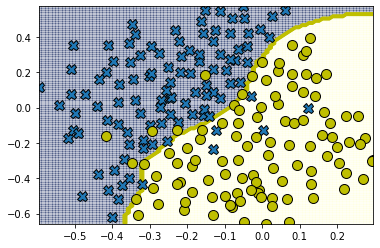

In [21]:
SVM.visualizeBoundary(X, y, model)